In [6]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib as mpl

In [7]:
def ReLU(x):
    return np.where(x<0,0,x)

In [8]:
import os, sys
currentdir = os.path.dirname(os.path.abspath(os.getcwd()))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, currentdir) 

# sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1})
cmap = 'coolwarm'

In [9]:
from scipy.stats import norm

def coupled_harmonic_oscillators(x,t,W):
    return np.dot(W,x) 

def coupled_harmonic_oscillators_bump(x,t,W,loc,scale):
    return np.dot(W,x) + norm.pdf(x, loc, scale)

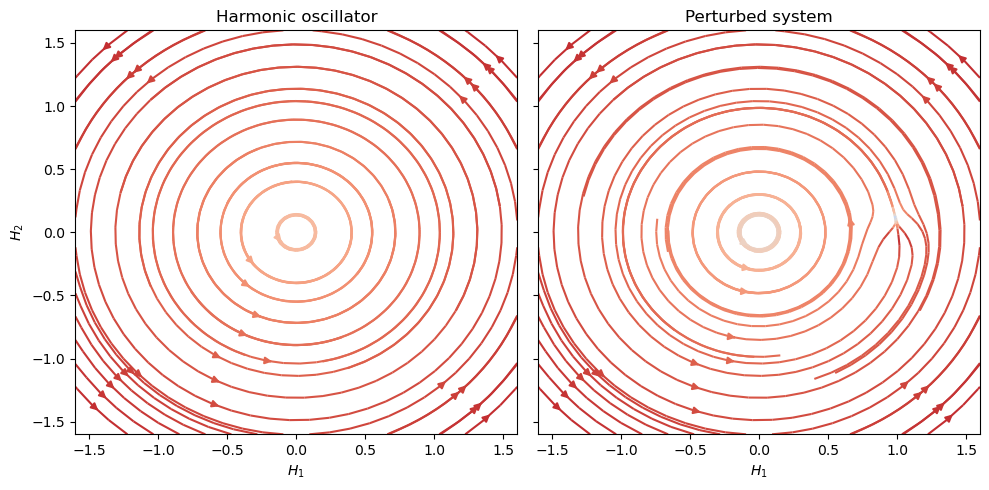

In [10]:
w = 1.6
Y, X = np.mgrid[-w:w:10j, -w:w:10j]
U = -Y 
V =  X
speed = np.log(np.sqrt(U**2 + V**2))

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
axs = axs.flat

# Line attractor dynamics
axs[0].set_title('Harmonic oscillator')
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[0].streamplot(X, Y, U, V, density=.6, broken_streamlines=False, color=speed, cmap=cmap, norm=normi)
# cbar = fig.colorbar(strm.lines)
# cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)
axs[0].set(xlim=(-w, w), ylim=(-w, w))
axs[0].set_xlabel("$H_1$")
axs[0].set_ylabel("$H_2$")

# Perturbed dynamics
axs[1].set_title('Perturbed system')

loc_x = 1
loc_y = 0
scale = 0.01
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
pos = np.dstack((X, Y))
rv = multivariate_normal([loc_x, loc_y], [[scale, 0.], [0., scale]])
U = -Y + (loc_x-X)*rv.pdf(pos)/1.
V =  X + (loc_y-Y)*rv.pdf(pos)/1.
speed = np.log(np.sqrt(U**2 + V**2))
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[1].streamplot(X, Y, U, V, density=.6, broken_streamlines=False, color=speed, cmap=cmap, norm=normi)
# cbar = fig.colorbar(strm.lines)
# cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)
axs[1].set_xlabel("$H_1$")

plt.tight_layout()
plt.savefig(currentdir+"/PoissonClicks/figs/harm_osc.pdf")
plt.show()

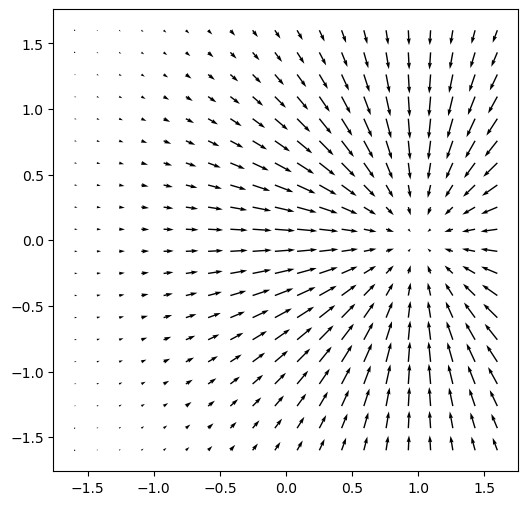

In [24]:
Y, X = np.mgrid[-w:w:20j, -w:w:20j]
scale = 1
pos = np.dstack((X, Y))
rv = multivariate_normal([loc_x, loc_y], [[scale, 0.], [0., scale]])
bump = rv.pdf(pos)/np.max(rv.pdf(pos))
U = -(X-loc_x)*bump
V = -(Y-loc_y)*bump

fig = plt.figure(figsize=(6,6))
plt.quiver(X,Y, U, V)

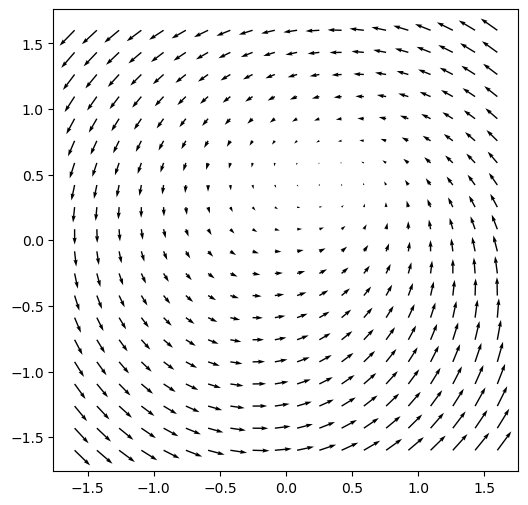

In [41]:
loc_x = 1
loc_y = 0
scale = 10000
alpha = 1
Y, X = np.mgrid[-w:w:20j, -w:w:20j]
pos = np.dstack((X, Y))
rv = multivariate_normal([loc_x, loc_y], [[scale, 0.], [0., scale]])
U = -Y -(X-loc_x)*bump*alpha
V =  X -(Y-loc_y)*bump*alpha

fig = plt.figure(figsize=(6,6))
plt.quiver(X,Y, U, V)

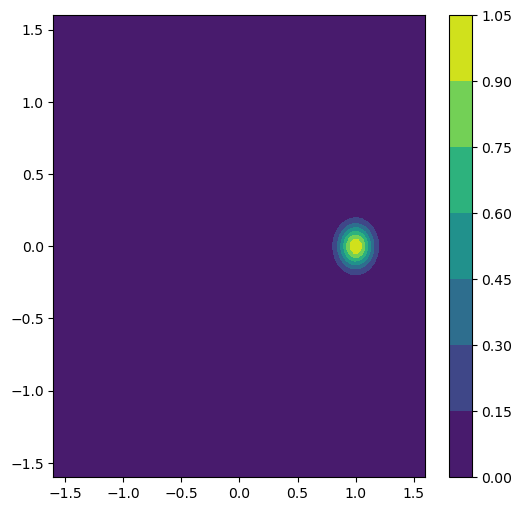

In [14]:

Y, X = np.mgrid[-w:w:100j, -w:w:100j]
pos = np.dstack((X, Y))
rv = multivariate_normal([loc_x, loc_y], [[scale, 0.], [0., scale]])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
bump = rv.pdf(pos)/np.max(rv.pdf(pos))/1.
CS = ax.contourf(X, Y, bump)
# plt.clabel(CS, inline=1, fontsize=10)
cbar = fig.colorbar(CS)

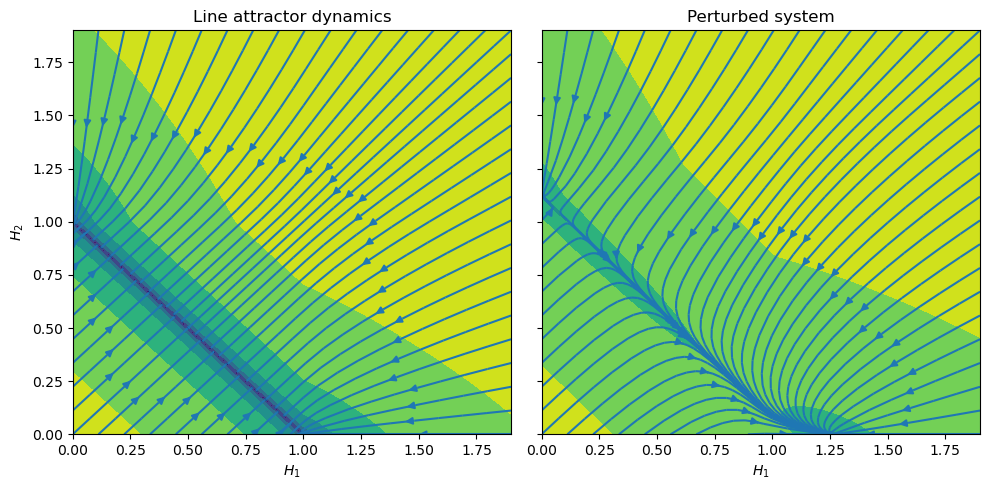

In [8]:
W_hh = np.array([[.0,-1.0],[-1,0]])
Wx = np.array([[-1.,0],[0,-1]])
b = np.array([1.,1.])

w = 1.9
Y, X = np.mgrid[0:w:100j, 0:w:100j]
# ReLU(np.dot(W_hh, x) + b) + np.dot(Wx, x)
U = ReLU(W_hh[0,0]*X + W_hh[0,1]*Y + b[0]) - X
V = ReLU(W_hh[1,0]*X + W_hh[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
axs = axs.flat

# Line attractor dynamics
axs[0].set_title('Line attractor dynamics')
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[0].streamplot(X, Y, U, V, density=.6, broken_streamlines=False)
axs[0].contourf(X, Y, speed)
# cbar = fig.colorbar(strm.lines)
cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)

# Fixed point
# fixed_point = np.array([0,0])
# axs[0].plot(fixed_point[0], fixed_point[1], 'bo')
axs[0].set(xlim=(0, w), ylim=(0, w))

seed_points = np.array([[0.0, 0.001], [0.2, 1.1]])
# axs[0].streamplot(X, Y, U, V, color='crimson', linewidth=2, start_points=seed_points, integration_direction='forward', broken_streamlines=False)

axs[0].set_xlabel("$H_1$")
axs[0].set_ylabel("$H_2$")

# Perturbed dynamics
axs[1].set_title('Perturbed system')
W_hh_pert = W_hh
W_hh_pert += np.random.normal(.1, .1, (2,2))

b_pert = b
b_pert += np.random.normal(0, 0.01, (2))

U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b_pert[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b_pert[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))

normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[1].streamplot(X, Y, U, V, density=.6, broken_streamlines=False)
# cbar = fig.colorbar(strm.lines)
axs[1].contourf(X, Y, speed)
cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)


# axs[1].plot(fixed_point[0], fixed_point[1], 'bo')
seed_points = np.array([[0.0, 0.001], [0.2, 1.1]])
# axs[1].streamplot(X, Y, U, V, color='crimson', linewidth=2, start_points=seed_points, integration_direction='forward', density=1, broken_streamlines=False)
axs[1].set_xlabel("$H_1$")

plt.tight_layout()
plt.savefig(currentdir+"/PoissonClicks/figs/lineattractor_cf.pdf")
plt.savefig(currentdir+"/PoissonClicks/figs/lineattractor_cf.png")
plt.show()

Text(958.4155713383838, 0.5, 'log(speed)')

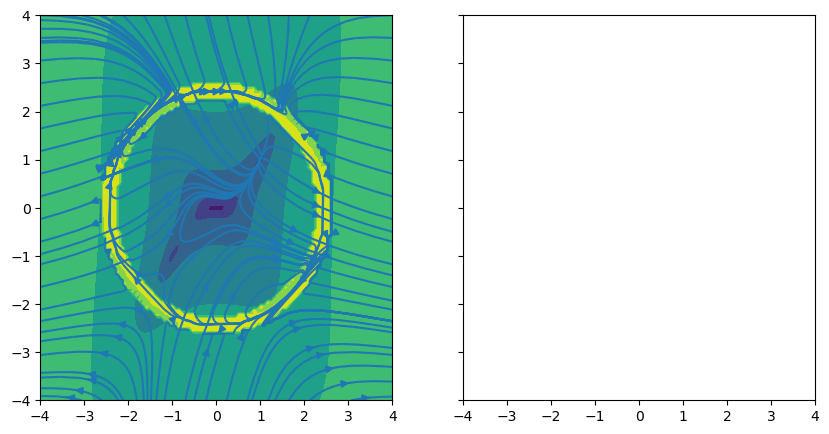

In [9]:
w = 4
factor = 1000
def circle_push(x, y, threshold=6, radius=.8):
    # return np.where(x**2+y**2<threshold,x,-2*x)
    return np.where(np.abs(x**2+y**2-threshold)<radius,np.abs(x**2+y**2-threshold)-radius,0)

def circle_push_sign(x, y, threshold=6, radius=.8):
    # return np.where(x**2+y**2<threshold,x,-2*x)
    return np.where(np.abs(x**2+y**2-threshold)<radius,-np.sign(x**2+y**2-threshold),0)
    
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U =  X**3 - Y    + circle_push(X, Y)*np.sin(np.arctan2(Y,X)+np.pi)*factor + circle_push_sign(X, Y)*np.cos(np.arctan2(Y,X))      *factor/2
V = -X**2 + Y**2 + circle_push(X, Y)*np.cos(np.arctan2(Y,X))*factor       + circle_push_sign(X, Y)*np.sin(np.arctan2(Y,X)+np.pi)*factor/2

# U =  circle_push_sign(X, Y)*np.cos(np.arctan2(Y,X))
# V =  circle_push_sign(X, Y)*np.sin(np.arctan2(Y,X))
speed = np.log(np.sqrt(U**2 + V**2))

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
axs = axs.flat

# 
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[0].streamplot(X, Y, U, V, density=.6, broken_streamlines=False)
axs[0].contourf(X, Y, speed)
cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)